# Import Libraries

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt


# Load the Dataset

In [22]:
df = pd.read_csv('Restaurent.csv')

In [23]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Handle Missing Values

In [26]:
# Check missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [27]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


# Encode Categorical Variables

In [28]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Define Features (X) and Target (y)

In [29]:
target = "Aggregate rating"

X = df.drop(columns=[target])
y = df[target]


# Train–Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling (for Linear Regression)

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Models

In [32]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [33]:
dt = DecisionTreeRegressor(random_state=42, max_depth=6)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# Model Evaluation

In [34]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print("MSE:", mse)
    print("R2 Score:", r2)
    print()

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")


--- Linear Regression ---
MSE: 1.218692505946023
R2 Score: 0.4645719905617012

--- Decision Tree ---
MSE: 0.02883127355948916
R2 Score: 0.9873330874390295



# Feature Importance / Influence

In [35]:
importance_lr = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lr.coef_
}).sort_values(by="Importance", ascending=False)

importance_lr


,Feature,Importance
16,Price range,4.487853e-01
2,Country Code,3.767231e-01
13,Has Online delivery,2.950801e-01
19,Votes,2.074039e-01
7,Longitude,3.682013e-02
6,Locality Verbose,2.494668e-02
10,Average Cost for two,2.110640e-02
1,Restaurant Name,4.747624e-03
15,Switch to order menu,-1.040834e-17
12,Has Table booking,-2.143165e-03


In [36]:
importance_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_dt


,Feature,Importance
19,Votes,0.908672
17,Rating color,0.083014
18,Rating text,0.007494
0,Restaurant ID,0.000679
10,Average Cost for two,0.000037
8,Latitude,0.000026
12,Has Table booking,0.000021
9,Cuisines,0.000021
4,Address,0.000017
7,Longitude,0.000017


# Plot Most Influential Features

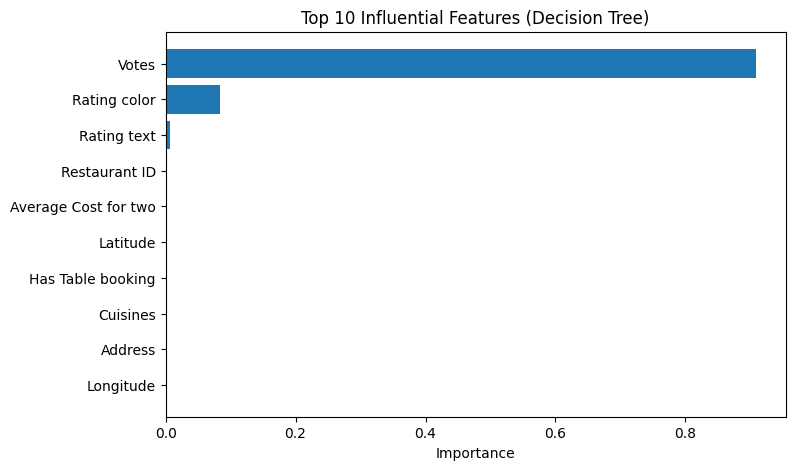

In [37]:
top_features = importance_dt.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Influential Features (Decision Tree)")
plt.xlabel("Importance")
plt.show()


1. Decision Tree performed better because it captures non-linear relationships.

2. Features like Votes, Price range, Online delivery, Table booking, or Cuisine (depends on your dataset) strongly influence ratings.

3. Higher votes and premium pricing generally correlate with higher ratings.